In [3]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

import planckStyle
import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


In [4]:
#dir_name = '/home/isidro/SuperMC/chains/owaChains1'
#dir_name = '/home/isidro/SuperMC_fork_20nov/april/chains'
dir_name = '/home/isidro/SuperMC_/chains'

#roots = ['owaCDM_py_SN+BBAO+RiessH0_mh_50000_1', 'owaCDM_SN+BBAO+RiessH0_snest_0.6', 'owaCDM_SN+BBAO+RiessH0_mnest_0.6',
        #'owaCDM_SN+BBAO+RiessH0_sbambi_0.6', 'owaCDM_SN+BBAO+RiessH0_bambi_0.6']

roots = ['LCDM_py_SN+Planck_mnest_0.5', 'LCDM_py_BBAO+Planck_mnest_0.5', 
        'LCDM_py_HD+Planck_mnest_0.5',
        'LCDM_py_SN+BBAO+HD+Planck_mnest_0.5']


In [8]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 9,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

<Figure size 648x583.2 with 0 Axes>

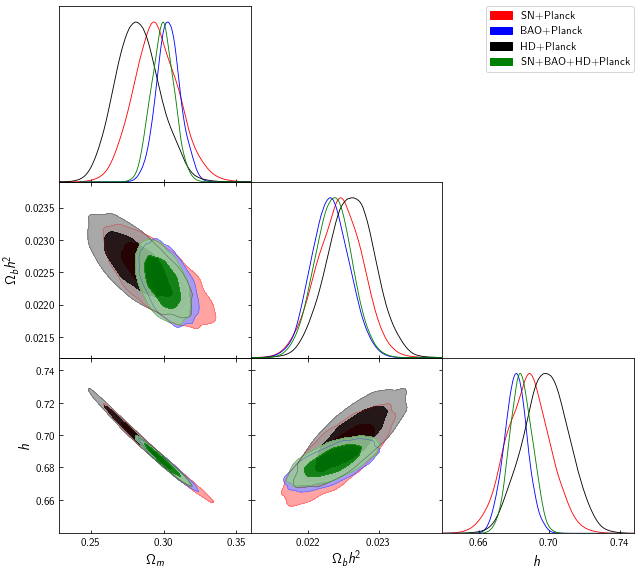

In [13]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 12
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'

#g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
#                
#                filled = False, nx=1, alphas=[0.7], 
#                colors=['red','blue','black','green','yellow'],
                #legend_labels=['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI'], 
                #normalized=False, shaded=False)

g.triangle_plot(roots, ['Om', 'Obh2', 'h'], 
                diag1d_kwargs={'colors':['red','blue','black','green']},
                colors=['red','blue','black','green'],
                alphas = [0.9],
                legend_labels=['SN+Planck', 'BAO+Planck', 'HD+Planck', 'SN+BAO+HD+Planck'], 
                filled = True, 
                normalized=False, shaded=False)
        
#plt.show()
#plt.savefig('samplersTriangleLCDM.png', dpi=300)

# Probando análisis con Getdist

Generate a MCSample object

In [9]:
MHsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[0], settings={'ignore_rows':0.2})
ENSsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[1])
MULTINESTsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[2])
SBAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[3])
BAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[4])

/home/isidro/SuperMC_/chains/owaCDM_py_SN+HD+BBAO+Planck_snest_0.5.txt
Removed 0.3 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_mnest_0.5.txt
Removed 0.3 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+HD+BBAO+Planck_sbambi_0.5.txt
Removed 0.3 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_bambi_0.5.txt
Removed 0.3 as burn in


In [10]:
freeParameters = ['Om', 'Obh2', 'h','w','wa','Ok']
samplersNames = ['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI']

meansMH = MHsamplefile.getMeans()
meansENS = ENSsamplefile.getMeans()
meansMULTI = MULTINESTsamplefile.getMeans()
meansSBAMBI = SBAMBIsamplefile.getMeans()
meansBAMBI = BAMBIsamplefile.getMeans()

stdMH = MHsamplefile.std(freeParameters)
stdENS = ENSsamplefile.std(freeParameters)
stdMULTI = MULTINESTsamplefile.std(freeParameters)
stdSBAMBI = SBAMBIsamplefile.std(freeParameters)
stdBAMBI = BAMBIsamplefile.std(freeParameters)


print("MH:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansMH[i], 4)) + " \pm " + str(round(stdMH[i], 4)) + "$}")

print("ENS:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansENS[i], 4)) + " \pm " + str(round(stdENS[i], 4)) + "$}")

print("MULTINEST:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansMULTI[i], 4)) + " \pm " + str(round(stdMULTI[i], 4)) + "$}")

print("ENS + ANN:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansSBAMBI[i], 4)) + " \pm " + str(round(stdSBAMBI[i], 4)) + "$}")

print("BAMBI:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansBAMBI[i], 4)) + " \pm " + str(round(stdBAMBI[i], 4)) + "$}")


##MHsamplefile.std('wa')


MH:
& \scriptsize{$0.3097 \pm 0.0103$}
& \scriptsize{$0.0225 \pm 0.0004$}
& \scriptsize{$0.6684 \pm 0.0108$}
& \scriptsize{$-0.8318 \pm 0.0737$}
& \scriptsize{$-0.6486 \pm 0.2625$}
& \scriptsize{$-0.005 \pm 0.003$}
ENS:
& \scriptsize{$0.3056 \pm 0.0097$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6717 \pm 0.0106$}
& \scriptsize{$-0.865 \pm 0.0698$}
& \scriptsize{$-0.5301 \pm 0.2606$}
& \scriptsize{$-0.005 \pm 0.0031$}
MULTINEST:
& \scriptsize{$0.306 \pm 0.0098$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6715 \pm 0.0105$}
& \scriptsize{$-0.8661 \pm 0.0699$}
& \scriptsize{$-0.5241 \pm 0.2608$}
& \scriptsize{$-0.005 \pm 0.0031$}
ENS + ANN:
& \scriptsize{$0.3057 \pm 0.0097$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.672 \pm 0.0104$}
& \scriptsize{$-0.8669 \pm 0.0688$}
& \scriptsize{$-0.5312 \pm 0.2605$}
& \scriptsize{$-0.0049 \pm 0.0031$}
BAMBI:
& \scriptsize{$0.3058 \pm 0.0096$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6718 \pm 0.0103$}
& \scriptsiz

In [151]:
MHsamplefile.std('wa')

0.6037760778129502